# Finding the root of a mathematical function

[Here](https://scipy-lectures.org/advanced/mathematical_optimization/) is an excellent resource from scipy on this lecture.

Why find the root (points $x$ where $f(x) = 0$)? Because we can re-frame most optimization problems in terms of root-finding.

Recall that the minimum of a function is wheree $f'(x) = 0$ so it's root-finding for the derivative of the function.

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

(-5.0, 5.0)

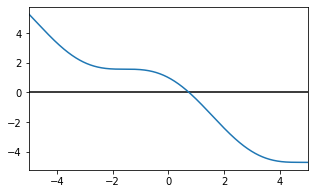

In [2]:
def f(x):
    return np.cos(x) - x

x = np.linspace(-5, 5, 1000)
y = f(x)


fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.axhline(0, color='k')
ax.plot(x, y)
ax.set_xlim(-5, 5)

**Bisection**

One of the most common algorithms for numerical root-finding is *bisection*.

To understand the idea, recall the well-known game where

- Player A thinks of a secret number between 1 and 100  
- Player B asks if it’s less than 50  
  
  - If yes, B asks if it’s less than 25  
  - If no, B asks if it’s less than 75  
  

And so on.

This is bisection; It works for all sufficiently well behaved increasing continuous functions with $ f(a) < 0 < f(b) $.

min: 0.739085133214985


(-5.0, 5.0)

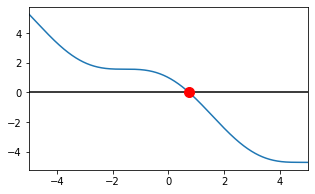

In [3]:
import scipy.optimize as opt

x_min = opt.bisect(f, -5, 5)
print(f"min: {x_min}")

fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.axhline(0, color='k')
ax.plot(x, y)
# The underscore plugs from the previous input
ax.scatter([x_min], [0], c='r', s=100, zorder=10)
ax.set_xlim(-5, 5)

### Hybrid Methods

A general principle of numerical methods is as follows:

- If you have specific knowledge about a given problem, you might be able to exploit it to generate efficiency.  
- If not, then the choice of algorithm involves a trade-off between speed and robustness.  


In practice, most default algorithms for root-finding, optimization and fixed points use *hybrid* methods.

These methods typically combine a fast method with a robust method in the following manner:

1. Attempt to use a fast method  
1. Check diagnostics  
1. If diagnostics are bad, then switch to a more robust algorithm  


In `scipy.optimize`, the function `brentq` is such a hybrid method and a good default

In [4]:
opt.brentq(f, -5, 5)

0.7390851332151607

In [5]:
%timeit opt.bisect(f, -5, 5)
%timeit opt.brentq(f, -5, 5)

39.5 µs ± 832 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
8.14 µs ± 58.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# Part 2: Minimizing a mathematical function

Most numerical packages provide only functions for *minimization*.

Maximization can be performed by recalling that the maximizer of a function $ f $ on domain $ D $ is
the minimizer of $ -f $ on $ D $.

Minimization is closely related to root-finding: For smooth functions, interior optima correspond to roots of the first derivative.

The speed/robustness trade-off described above is present with numerical optimization too.

Unless you have some prior information you can exploit, it’s usually best to use hybrid methods.

For constrained, univariate (i.e., scalar) minimization, a good hybrid option is `fminbound`.

### Gradient Descent

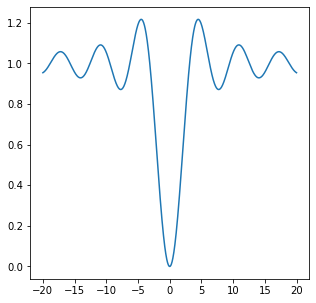

In [15]:
def f(x):
    return 1 - np.sin(x) / x

x = np.linspace(-20., 20., 1000)
y = f(x)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(x, y)

Multivariate local optimizers include `minimize`, `fmin`, `fmin_powell`, `fmin_cg`, `fmin_bfgs`, and `fmin_ncg`.

Constrained multivariate local optimizers include `fmin_l_bfgs_b`, `fmin_tnc`, `fmin_cobyla`.

See the [documentation](http://docs.scipy.org/doc/scipy/reference/optimize.html) for details.

(-20.0, 20.0)

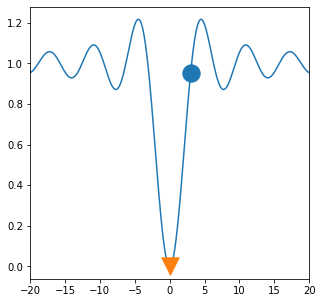

In [16]:
x0 = 3
xmin = opt.minimize(f, x0).x

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(x, y)
ax.scatter(x0, f(x0), marker='o', s=300)
ax.scatter(xmin, f(xmin), marker='v', s=300,
           zorder=20)
ax.set_xlim(-20, 20)

(-20.0, 20.0)

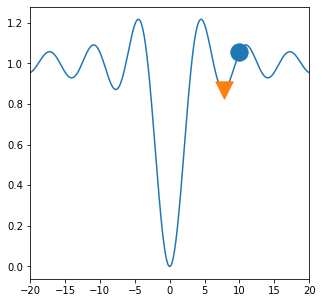

In [17]:
x0 = 10
xmin = opt.minimize(f, x0).x

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(x, y)
ax.scatter(x0, f(x0), marker='o', s=300)
ax.scatter(xmin, f(xmin), marker='v', s=300,
           zorder=20)
ax.set_xlim(-20, 20)

(-20.0, 20.0)

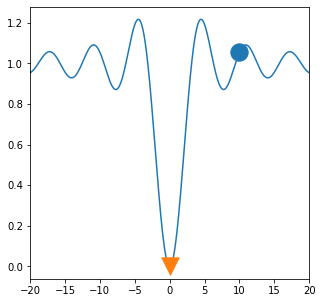

In [18]:
# We use 1000 iterations.
xmin = opt.basinhopping(f, x0, 1000).x

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(x, y)
ax.scatter(x0, f(x0), marker='o', s=300)
ax.scatter(xmin, f(xmin), marker='v', s=300,
           zorder=20)
ax.set_xlim(-20, 20)